# Optimal Skills Combination for Data Scientists in Europe 2023: A Pathway to Success and High Compensation

This notebook investigates which skill combinations yield the best career outcomes in terms of success and salary for Data Scientists in Europe. By analyzing individual skill effectiveness, aggregating key salary metrics, and categorizing technology domains, we reveal how a blend of core, cloud, and specialized skills is associated with superior compensation.

## Chapter 1: Environment Setup and Data Acquisition

Here we import the required libraries, set our configuration parameters, and load the European job market data.

In [10]:
from helper_scripts.prepare_dataframe import get_european_dataframe
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text
import collections
import ast
from matplotlib.ticker import PercentFormatter

# Parameter: minimum percentage threshold of job postings for a skill to be considered "high demand"
SKILL_PERCENTAGE_THRESHOLD = 5  # in percent

*This setup ensures we have all tools available to perform our analysis and define a threshold to filter high-demand skills.*

## Chapter 2: Analyzing Skill Effectiveness and Compensation

In this section, we focus on Data Scientist roles. We filter out records missing salary data, explode the `job_skills` list to facilitate skill-level analysis, and aggregate key metrics.

### 2.1 Data Preparation

In [11]:
# Load the European job market data and focus on Data Scientist positions
jobs_df = get_european_dataframe()
ds_jobs_df = jobs_df[jobs_df["job_title_short"] == "Data Scientist"].copy()
ds_jobs_df = ds_jobs_df.dropna(subset=["salary_year_avg"])

# Explode the 'job_skills' column so that each skill is in its own row
ds_skills_exploded = ds_jobs_df.explode("job_skills")

# Display a sample of salary and skill data for initial insight
display(ds_skills_exploded[["salary_year_avg", "job_skills"]].head(10))

,salary_year_avg,job_skills
212,157500.0,c
212,157500.0,r
212,157500.0,sql
212,157500.0,python
212,157500.0,aws
212,157500.0,azure
212,157500.0,hadoop
212,157500.0,tableau
1107,157500.0,python
1107,157500.0,numpy


### 2.2 Aggregating Skill Metrics

We compute the count and median salary for each skill. Then, we calculate the percentage of job postings that mention a skill and keep only those surpassing our demand threshold.

In [12]:
# Aggregate skill metrics: count of occurrences and median salary for each skill
agg_skills = (
    ds_skills_exploded.groupby("job_skills")["salary_year_avg"]
    .agg(["count", "median"])
    .sort_values(by="count", ascending=False)
    .rename(columns={"count": "skill_count", "median": "median_salary"})
)

# Total number of Data Scientist job postings (for percentage calculation)
total_ds_jobs = len(ds_jobs_df)
agg_skills["skill_percent"] = (agg_skills["skill_count"] / total_ds_jobs) * 100

# Keep only skills with at least one occurrence then filter high-demand skills
agg_skills = agg_skills[agg_skills["skill_count"] > 0]
high_demand_skills = agg_skills[
    agg_skills["skill_percent"] > SKILL_PERCENTAGE_THRESHOLD
]

# Inspect the aggregated skill metrics
display(high_demand_skills)

,skill_count,median_salary,skill_percent
job_skills,,,
python,252,123032.00,62.686567
sql,181,115000.00,45.024876
r,83,118205.00,20.646766
tableau,69,131560.00,17.164179
aws,64,145920.50,15.920398
spark,52,131560.00,12.935323
tensorflow,46,114751.75,11.442786
azure,43,132500.00,10.696517
pytorch,42,106867.00,10.447761


*This aggregation provides us a dual view of both the prevalence and the compensation associated with each skill.*

## Chapter 3: Visualizing Skill Effectiveness vs. Compensation

We now create a scatter plot to visualize the relationship between job posting percentage (as a proxy for demand) and median salary for high-demand skills.

### 3.1 Scatter Plot of Demand vs. Compensation

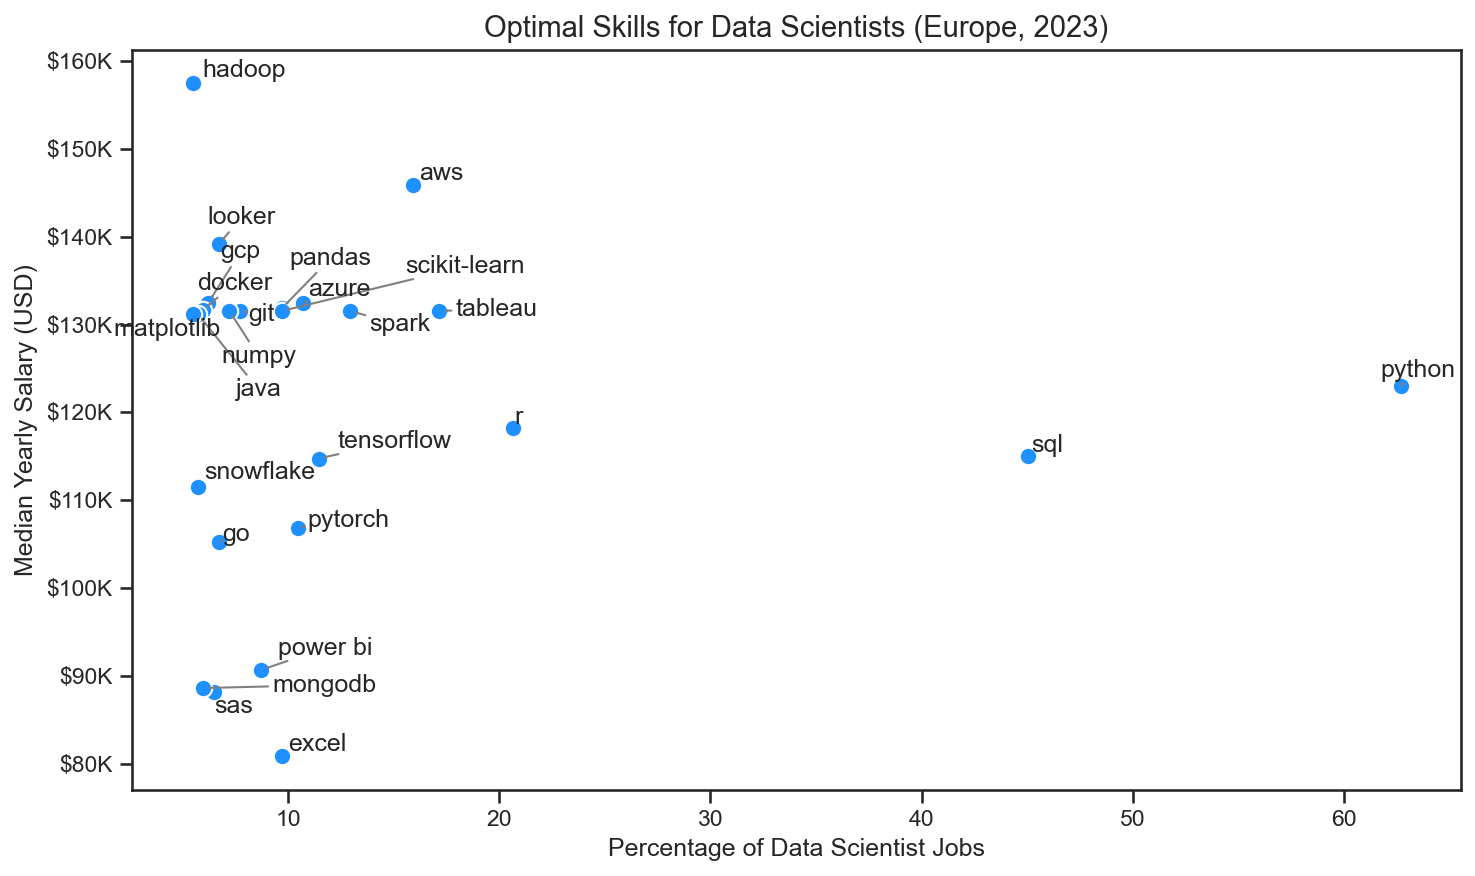

In [13]:
plt.figure(figsize=(10, 6), dpi=150)
plt.scatter(
    high_demand_skills["skill_percent"],
    high_demand_skills["median_salary"],
    s=70,
    color="dodgerblue",
    edgecolor="white",
)
plt.title("Optimal Skills for Data Scientists (Europe, 2023)", fontsize=14)
plt.xlabel("Percentage of Data Scientist Jobs", fontsize=12)
plt.ylabel("Median Yearly Salary (USD)", fontsize=12)
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"${int(y/1000)}K"))

# Annotate each point with the corresponding skill name
annotations = []
for i, skill in enumerate(high_demand_skills.index):
    annotations.append(
        plt.text(
            high_demand_skills["skill_percent"].iloc[i],
            high_demand_skills["median_salary"].iloc[i],
            skill,
        )
    )

# Adjust text to minimize overlap
adjust_text(annotations, arrowprops=dict(arrowstyle="->", color="grey"))
plt.tight_layout()
plt.show()

*This plot visualizes which skills are not only in high demand but are also associated with premium salary levels.*

## Chapter 4: Associating Skills with Technology Categories

Beyond individual skills, we explore how these skills align with broader technology categories. We extract technology information from the `job_type_skills` column, convert the string representation to an actionable dictionary, and merge it with our aggregated skill metrics.

### 4.1 Processing Technology Categories

In [14]:
# Extract and process the technology information from the "job_type_skills" column
tech_series = jobs_df["job_type_skills"].drop_duplicates().dropna()

# Build a dictionary mapping each technology category to a set of related skills
technology_dict = collections.defaultdict(set)
for row in tech_series:
    # Convert the string representation of the dictionary into an actual dictionary
    parsed_dict = ast.literal_eval(row)
    for tech_category, skills_list in parsed_dict.items():
        technology_dict[tech_category].update(skills_list)

# Convert the technology dictionary into a DataFrame and explode the skills list
tech_df = pd.DataFrame(list(technology_dict.items()), columns=["technology", "skills"])
tech_df = tech_df.explode("skills")
display(tech_df)

,technology,skills
0,analyst_tools,sap
0,analyst_tools,word
0,analyst_tools,visio
0,analyst_tools,nuix
0,analyst_tools,powerbi
...,...,...
9,sync,slack
9,sync,symphony
9,sync,ringcentral
9,sync,zoom


### 4.2 Merging Skill Metrics with Technology Information

In [15]:
# Merge the aggregated skill metrics with the technology DataFrame based on the skill name
skills_with_tech = agg_skills.merge(tech_df, left_on="job_skills", right_on="skills")

# Keep only high-demand skills based on the established threshold
skills_with_tech_high_demand = skills_with_tech[
    skills_with_tech["skill_percent"] > SKILL_PERCENTAGE_THRESHOLD
]

*This step enriches our analysis by showing how high-demand skills cluster within technology categories.*

## Chapter 5: Visualizing Combined Effects with Technology Categories

We then create a scatter plot that visualizes the demand and salary metrics, colored by their associated technology category.

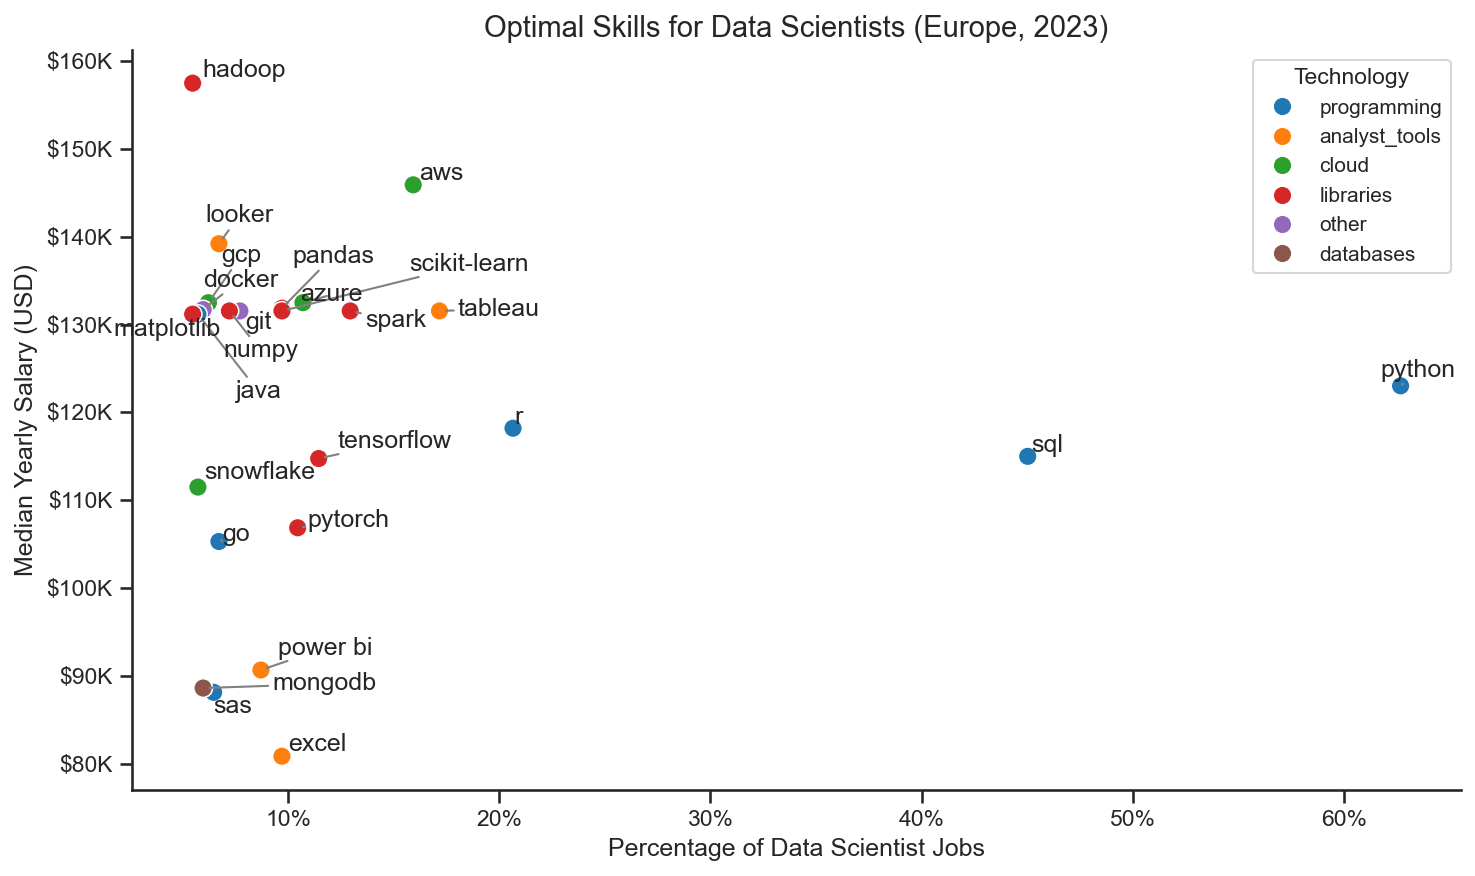

In [16]:
plt.figure(figsize=(10, 6), dpi=150)
sns.scatterplot(
    data=skills_with_tech_high_demand,
    x="skill_percent",
    y="median_salary",
    hue="technology",
    palette="tab10",
    s=80,
)
sns.despine()

# Format the plot
sns.set_theme(style="ticks")
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K"))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.xlabel("Percentage of Data Scientist Jobs", fontsize=12)
plt.ylabel("Median Yearly Salary (USD)", fontsize=12)
plt.title("Optimal Skills for Data Scientists (Europe, 2023)", fontsize=14)
plt.legend(title="Technology", fontsize=10, title_fontsize=11)

# Annotate points with skill names (using adjustText to avoid overlaps)
annotations = []
for i, skill in enumerate(high_demand_skills.index):
    annotations.append(
        plt.text(
            high_demand_skills["skill_percent"].iloc[i],
            high_demand_skills["median_salary"].iloc[i],
            skill,
        )
    )

adjust_text(annotations, arrowprops=dict(arrowstyle="->", color="gray"))
plt.tight_layout()
plt.show()

*This enhanced visualization clearly shows the interplay between skill demand, compensation, and technology domains.*

## Chapter 6: Key Insights and Final Remarks

### Insights

- **Strong Core with Room to Expand:**  
  Foundational skills such as **Python** and **SQL** form the bedrock of Data Science roles. Although their median salaries (around $123K and $115K, respectively) are moderate, they are indispensable and appear in a significant percentage of job postings.

- **Cloud Expertise Boosts Compensation:**  
  Incorporating cloud technologies like **AWS** (16% of postings, median salary ≈ $146K) and **Azure** (11%, median salary ≈ $133K) into one’s skill set can lead to substantially higher compensation. These cloud capabilities serve as a catalyst for increased earning potential.

- **Specialized Tools Command Premiums:**  
  Skills that are less frequently required but highly specialized—such as **Hadoop** (at 6% of postings with a median salary of approximately $158K)—demonstrate that niche expertise commands a premium. Complementary tools like Tableau, Spark, and Looker, while less common, often push compensation upward.

### Final Remarks

Integrating a balanced mix of core programming skills, cloud expertise, and specialized data tools appears to be the most effective strategy for achieving both career success and high compensation for Data Scientists in Europe. By understanding these trends, professionals can tailor their skill development efforts to stay competitive in a rapidly evolving market.